In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
states = np.array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
                  [0.1, 0.1, 0.9, 0.9, 0.9, 0.1, 0.1, 0.9, 0.9, 0.1]])

tpm = np.array([[0.95, 0.05], [0.15, 0.85]])
pi = np.array([0.9, 0.1])

In [13]:
D = states.shape[1]
N = states.shape[0]

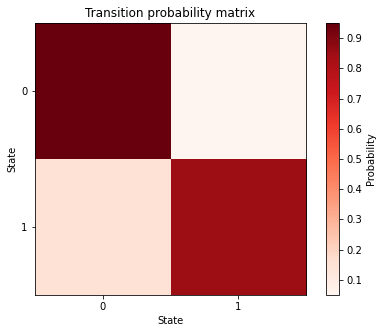

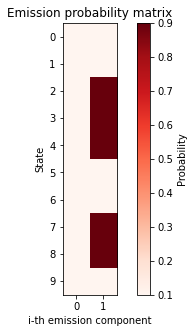

In [14]:
plt.figure(figsize = (7,5))
plt.imshow(tpm, cmap = 'Reds')
plt.colorbar(label = 'Probability')
plt.xticks([0,1])
plt.yticks([0,1])
plt.xlabel('State')
plt.ylabel('State')
plt.title('Transition probability matrix')
plt.show()

plt.figure(figsize = (7,5))
plt.imshow(states.T, cmap = 'Reds')
plt.colorbar(label = 'Probability')
plt.yticks(np.arange(10))
plt.xticks([0,1])
plt.ylabel('State')
plt.xlabel('i-th emission component')
plt.title('Emission probability matrix')
plt.show()

In [15]:
n_samples = 10000

data = np.zeros((n_samples, D)).astype('int')
stateseq = np.zeros(n_samples).astype(np.int8)

stateseq[0] = np.random.choice(np.arange(N), p = pi)
current_state = states[stateseq[0]]

for i, phi in enumerate(current_state):
    data[0][i] = np.random.choice([0,1], p = [1-phi, phi])

for t in range(n_samples-1):
    new_state = np.random.choice(np.arange(N), p = tpm[stateseq[t]])
    stateseq[t+1] = new_state
    for i, phi in enumerate(states[new_state]):
        data[t+1][i] = np.random.choice([0,1], p = [1-phi, phi])

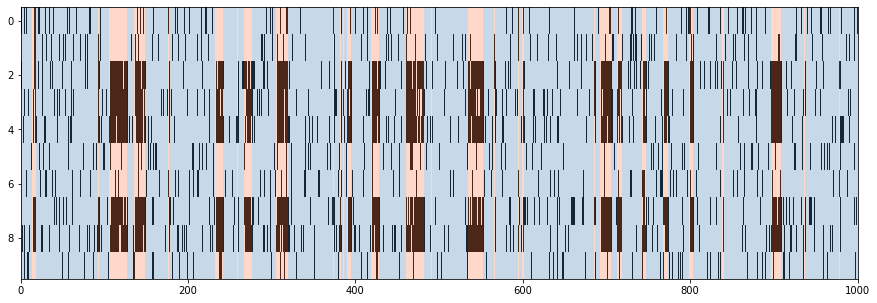

In [17]:
ch = np.concatenate([np.array([0]),np.where(np.diff(stateseq) != 0)[0], np.array([len(stateseq)])])

colors = ['steelblue', 'coral']

plt.figure(figsize = (15,5))

for idx, i in enumerate(ch[:-1]):
    col = colors[stateseq[i+1]]
    plt.axvspan(i, ch[idx+1], facecolor=col, alpha=0.3)

plt.imshow(data.T, aspect = 'auto', cmap = 'Greys', interpolation = 'none')
plt.xlim(0,1000)
plt.show()

In [18]:
np.save('data.npy', data)
np.save('stateseq.npy', stateseq)